<a href="https://colab.research.google.com/github/good0neighbour/ESTCampAI/blob/main/Deeplearning/00_Deeplearning_%EB%A7%9B%EB%B3%B4%EA%B8%B0(%ED%9A%8C%EA%B7%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 딥러닝이란?
- 인간의 신경방을 모방해서, 학습 및 예측하는 기술
- 영상 처리, 음성 처리, 자연어 처리, 이미지 분야 등

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ESTCampAI/Deeplearning

/content/drive/MyDrive/ESTCampAI/Deeplearning


In [ ]:
!pwd

/content/drive/MyDrive/ESTCampAI/Deeplearning


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 데이터 로드
data = pd.read_csv("./data/student-mat.csv", delimiter = ";")

In [ ]:
data.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


| 컬럼 이름       | 설명                             |
|-----------------|----------------------------------|
| school          | 학교 (GP - Gabriel Pereira, MS - Mousinho da Silveira) |
| sex             | 성별 (F - Female, M - Male)      |
| age             | 나이                             |
| address         | 주소 유형 (U - Urban, R - Rural) |
| famsize         | 가족 크기 (LE3 - 3명 이하, GT3 - 3명 초과) |
| Pstatus         | 부모 동거 상태 (T - 함께, A - 별거) |
| Medu            | 어머니 교육 수준 (0 - 없음, 1 - 초등, 2 - 중등, 3 - 고등, 4 - 대졸) |
| Fedu            | 아버지 교육 수준 (0 - 없음, 1 - 초등, 2 - 중등, 3 - 고등, 4 - 대졸) |
| Mjob            | 어머니 직업 (teacher, health, services, at_home, other) |
| Fjob            | 아버지 직업 (teacher, health, services, at_home, other) |
| reason          | 학교 선택 이유 (home, reputation, course, other) |
| guardian        | 보호자 (mother, father, other)  |
| traveltime      | 통학 시간 (1 - 15분 이하, 2 - 15~30분, 3 - 30분~1시간, 4 - 1시간 초과) |
| studytime       | 주간 공부 시간 (1 - 2시간 이하, 2 - 2~5시간, 3 - 5~10시간, 4 - 10시간 초과) |
| failures        | 과목 낙제 수 (n if 1<=n<3, else 4) |
| schoolsup       | 학교 추가 지원 (yes, no)        |
| famsup          | 가족 추가 지원 (yes, no)        |
| paid            | 과외 수업 참여 (yes, no)        |
| activities      | 학교 외 활동 참여 (yes, no)     |
| nursery         | 유치원 참여 여부 (yes, no)      |
| higher          | 고등교육 희망 여부 (yes, no)    |
| internet        | 가정 내 인터넷 접속 여부 (yes, no) |
| romantic        | 로맨틱 관계 여부 (yes, no)      |
| famrel          | 가족 관계의 질 (1 - 매우 나쁨, 5 - 매우 좋음) |
| freetime        | 여가 시간의 양 (1 - 매우 적음, 5 - 매우 많음) |
| goout           | 외출 빈도 (1 - 매우 적음, 5 - 매우 많음) |
| Dalc            | 평일 음주량 (1 - 매우 적음, 5 - 매우 많음) |
| Walc            | 주말 음주량 (1 - 매우 적음, 5 - 매우 많음) |
| health          | 현재 건강 상태 (1 - 매우 나쁨, 5 - 매우 좋음) |
| absences        | 결석 일수                        |
| G1              | 1학기 성적                       |
| G2              | 2학기 성적                       |
| G3              | 최종 성적                        |

In [ ]:
data.info()

# label : G3 (최종성적)
# 일단은 하나의 특성(studytime)을 활용해서 학습을 시켜보자. → 머신러닝 vs 딥러닝

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## 데이터 분리

In [ ]:
X = data[["studytime"]]
y = data["G3"]

X.shape, y.shape

((395, 1), (395,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 2025
)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276, 1), (119, 1), (276,), (119,))

### 머신러닝(Sklearn) vs 딥러닝(TensorFlow) 모델링 비교

> 머신러닝
> - 모델 생성(완성되어 있는 객체 초기화) → 학습 → 예측 / 평가

> 딥러닝
> - 모델 생성(모델을 직접 구성) → 학습 → 예측 / 평가

### 실습! 머신러닝 모델링
- 전에 배웠었던 머신러닝을 상기해보자.

In [ ]:
# 모델 임포트
from sklearn.linear_model import LinearRegression

In [ ]:
# 모델 생성
model = LinearRegression()

In [ ]:
# 모델 학습
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 예측
y_pred = model.predict(X_test)

In [ ]:
# 평가 (MSE, 평균제곱오차)
from sklearn.metrics import mean_squared_error
print("평균 제곱 오차 :", mean_squared_error(y_test, y_pred))

평균 제곱 오차 : 23.164188168213375


### 머신러닝과 딥러닝의 적합도 기준 (참고용)
- 성능이 중요시된다. → 딥러닝
- 해석이 중요하다. → 머시러닝
- 특성이 잘 정의되어있다. → 머신러닝
- 연산 자원이 충분한 경우 → 딥러닝

### Tensorflow 딥러닝 모델링 프로세스
1. 신경망 구조 설계
2. 신경망 학습 방법
3. 학습
4. 예측/평가

In [ ]:
# tensorflow : 오픈소스 딥러닝 프레임워크
# keras : 사용자 핀화적 인터페이스 제공하는 API
from tensorflow.keras.models import Sequential # 모델 뼈대(틀)
from tensorflow.keras.layers import InputLayer, Dense

# Sequential : 순차적으로 쌓아올리는 구조를 사용하기 위한 일종의 틀
# InputLayer : 입력층, 입력을 받는 역할을 수행
# Dense : 완전연결층, 모든 입력 뉴런이 모든 출력 뉴런과 연결되어 있는 레이어(층)

In [ ]:
# 1. 신경망 구조 설계

# 1-1. 뼈대 생성 (초기화)
model = Sequential()

# 1-2. 입력층 - 입력 형태(모양)를 결정하는 역할
model.add(InputLayer(shape = (1,))) # 데이터셋 내에서 데이터 1ea의 모양 지정
# 특성을 입력받을 수 있는 준비 -> 공부시간이라는 1개의 특성을 입력 받을 수 있도록 모양 지정.

# 1-3. 중간층(은닉층)
model.add(Dense(units = 32, activation = "sigmoid"))
model.add(Dense(units = 64, activation = "sigmoid"))
model.add(Dense(units = 32, activation = "sigmoid"))
# 선형회귀와 노드(유닛, 뉴런)의 차이 → activation의 유무
# 역치 때문.
# 일반적인 경험에 의하면, 노드의 개수는 항아리 모양이 Best.

# 중간층 : 본격적인 연산을 하는 핵심 층.
# Dense : 이 층의 모든 뉴런(노드)이 이전 층의 모든 뉴런과 연결되었다.
# unit : 이 층에서 정보를 처리할 뉴런(노드)을 32개 만들겠다.
# -> 유닛, 노드, 뉴런 개수는 정답이 없음.
# activation(활성화 함수) : 뉴런이 다음 뉴런으로 정보를 넘길지 말지 결정하는 방법 지정

# 1-4. 출력층 - 출력 형태(모양)를 결정하는 역할
model.add(Dense(units = 1, activation = "linear"))
# 회귀, 이진분류, 다중분류에 따라 출력 형태가 달라지게 됨.
# 성적 1개의 결과를 내보낼 예정이므로 unit = 1, activation = linear 설정

In [ ]:
# 2. 신경망 학습 방법
model.compile(
    loss = "mean_squared_error", # 손실함수 : 모델의 오차(잘못된 정도)를 측정하는 방식 -> MSE
    optimizer = "SGD",           # 최적화 함수 : 오차를 줄이기 위해서 뉴런간의 가중치를 결정하는 방식(SGD : 경사하강법)
    metrics = ["mse"]            # 평가지표 : mse 사용해서 모델 평가.
)

In [ ]:
# 3. 학습
h = model.fit(
    X_train, y_train,       # 모델에 학습데이터를 넘겨줌(미리 준비해놓았음.)
    validation_split = 0.2, # train(학습) 데이터 중 20%를 사용해서 중간중간 쪽지시험을 봄
                            # → 모델이 train 데이터에 과적합되지 않도록
    epochs = 20             # 전체 훈련 데이터를 몇 번 학습을 할 건지 설정
) # 모델 학습시킬 때는 머신러닝 모델과 동일하게 fit 함수를 사용.

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 16.1051 - mse: 16.1051 - val_loss: 21.5766 - val_mse: 21.5766
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.2234 - mse: 19.2234 - val_loss: 21.6045 - val_mse: 21.6045
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 20.2536 - mse: 20.2536 - val_loss: 21.5477 - val_mse: 21.5477
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.5948 - mse: 19.5948 - val_loss: 22.0898 - val_mse: 22.0898
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.8333 - mse: 19.8333 - val_loss: 21.4896 - val_mse: 21.4896
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.3722 - mse: 21.3722 - val_loss: 22.0762 - val_mse: 22.0762
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.7837 - mse: 19.7837 - val_loss: 21.7329 - val_mse: 21.7329
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18.4860 - mse: 18.4860 - val_loss: 21.6492 - val_mse: 21.6492
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

In [ ]:
# 4. 예측
model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[10.711293],
       [10.74124 ],
       [10.74124 ],
       [10.711293],
       [10.74124 ],
       [10.711293],
       [10.711293],
       [10.767448],
       [10.711293],
       [10.767448],
       [10.74124 ],
       [10.74124 ],
       [10.74124 ],
       [10.74124 ],
       [10.74124 ],
       [10.74124 ],
       [10.74124 ],
       [10.74124 ],
       [10.74124 ],
       [10.767448],
       [10.789499],
       [10.711293],
       [10.74124 ],
       [10.767448],
       [10.74124 ],
       [10.74124 ],
       [10.767448],
       [10.74124 ],
       [10.711293],
       [10.767448],
       [10.711292],
       [10.74124 ],
       [10.767448],
       [10.74124 ],
       [10.74124 ],
       [10.767448],
       [10.711293],
       [10.711293],
       [10.74124 ],
       [10.74124 ],
       [10.711293],
       [10.711293],
       [10.74124 ],
       [10.74124 ],
       [10.74124 ],
       [10.74124 ],
       [10.74124 ],
       [10.74124 ],
       [10.711293],
       [10.767448],


In [ ]:
# 5. 평가 : 머신러닝 모델에서는 score 함수 사용
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 25.4456 - mse: 25.4456 


[22.533294677734375, 22.533294677734375]

In [ ]:
h # History 객체 : 모델의 학습 결과를 담아둔 객체
# 어떤 정보가 들어가 있는지 한번 확인해보자.
h.history.keys()
# h 안에 history 이름의 dictionary가 있음
# 학습 현황에서 봤던 정보가 차곡차곡 정리가 돼있다
# 학습 곡선 그려보기. : 훈련 오차(loss), validation 오차(val_loss) 변화를 그래프로 그려보기.
# 이 그래프를 통해서 모델이 과소적합 됐는지 혹은 과대적합됐는지 시각적으로 확인가능.

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

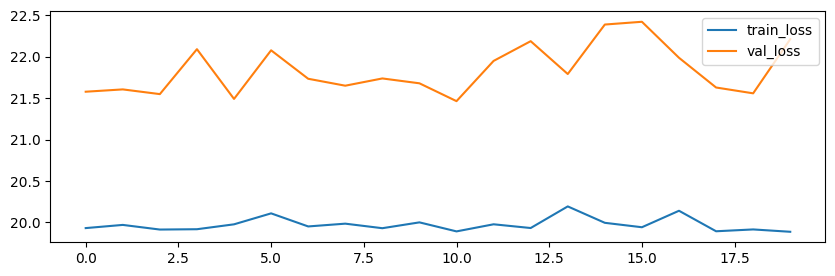

In [ ]:
# 모델 학습 곡선
plt.figure(figsize = (10, 3))
# 한 개의 좌표평면에 여러개 그래프
plt.plot(h.history["loss"], label = "train_loss")
plt.plot(h.history["val_loss"], label = "val_loss")
plt.legend(loc = "upper right") # loc 설정해서 legend 표기 위치 조절

plt.show()

### 문제 데이터를 1ea -> 4ea 골라서 학습을 다시 해보기.
- 수치형 자료 중에서 골라보기
- 은닉층, 노드 개수 이거는 마음대로 사용.

In [ ]:
# data 중에서 수치형 자료만 가져오기
# 편하게 데이터를 선택할 수 있도록
data.select_dtypes(include = ['float', 'int']).columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [ ]:
# 1. 데이터셋 구성
# 4가지 속성을 선택해서 새로운 X 구하기
X = data[["Medu", "Fedu", "studytime", "absences"]]
y = data["G3"]

In [ ]:
# 1-2. train, test 분리 -> test_size = 0.25, random_state = 2025
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2025)

In [ ]:
# train, test 잘 분리 됐는지 확인 해보기.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(296, 4) (99, 4) (296,) (99,)


In [ ]:
# 2. 모델 설계
# 1) 뼈대 설정
model = Sequential()
# 2) 입력층 : 1차원 데이터를 받을 수 있도록 설정 → 4차원 데이터 받을 수 있도록 설정
model.add(InputLayer(shape = X_train.iloc[0].shape))
# 3) 은닉층 : 유닛 개수 자유. 은닉층 개수 자유, activation = sigmoid
model.add(Dense(units = 32, activation = "sigmoid"))
model.add(Dense(units = 64, activation = "sigmoid"))
model.add(Dense(units = 32, activation = "sigmoid"))
# 4) 출력층 : 출력 모양은 위쪽과 동일
model.add(Dense(units = 1, activation = "linear"))

In [ ]:
# 3. 학습 방법 설정 : 위쪽과 동일
model.compile(loss = "mean_squared_error", optimizer = "SGD", metrics = ["mse"])

In [ ]:
# 4. 학습 : 학습 결과 기록을 h2 변수 저장
h2 = model.fit(X_train, y_train, validation_split = 0.2, epochs = 20)
# 모델 학습 코드를 여러번 돌리면 이전 학습 내용이 저장돼있기 때문에
# 학습할 때는 model 객체 생성부터 한번에 진행

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 76.2321 - mse: 76.2321 - val_loss: 21.0586 - val_mse: 21.0586
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 19.1380 - mse: 19.1380 - val_loss: 21.0708 - val_mse: 21.0708
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.0487 - mse: 21.0487 - val_loss: 21.3817 - val_mse: 21.3817
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 18.4834 - mse: 18.4834 - val_loss: 21.1368 - val_mse: 21.1368
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 20.8433 - mse: 20.8433 - val_loss: 21.0450 - val_mse: 21.0450
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.7441 - mse: 22.7441 - val_loss: 21.7285 - val_mse: 21.7285
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 20.3634 - mse: 20.3634 - val_loss: 22.0403 - val_mse: 22.0403
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21.0066 - mse: 21.0066 - val_loss: 21.3226 - val_mse: 21.3226
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

In [ ]:
# 5. 평가
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 25.6651 - mse: 25.6651


[22.73125457763672, 22.73125457763672]

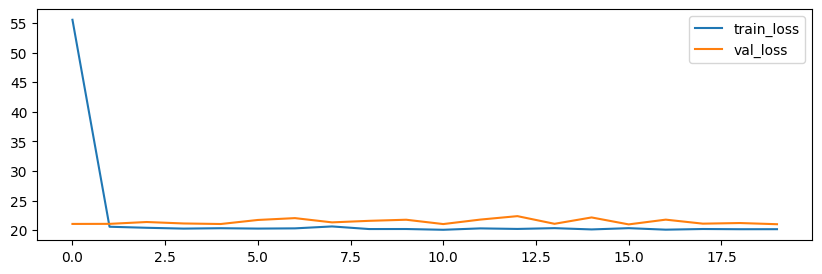

In [ ]:
plt.figure(figsize = (10, 3))

plt.plot(h2.history["loss"], label = "train_loss")
plt.plot(h2.history["val_loss"], label = "val_loss")
plt.legend(loc = "upper right")

plt.show()